# NYC Taxi Records: Data Cleaning and EDA

### Import and Clean the Dataframe

In [ ]:
# Import libraries
from google.colab import drive
import pandas as pd
import folium
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset



Feb = pd.read_csv('/content/drive/MyDrive/Taxi_Feb.csv')

March = pd.read_csv('/content/drive/MyDrive/Taxi_March.csv')


In [ ]:
# Concatenate the two DataFrames
NYTaxi = pd.concat([Feb, March], ignore_index=True)


In [ ]:
# Check the dataset
NYTaxi.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,DDS,2009-02-03 08:25:00,2009-02-03 08:33:39,1,1.60,-73.993,40.758,-,-,-73.995,40.740,CASH,6.9,0.0,-,0.0,0.0,6.9
1,VTS,2009-02-28 00:26:00,2009-02-28 00:40:00,5,3.05,0.000,0.000,-,-,0.000,0.000,CASH,10.5,0.5,-,0.0,0.0,11.0
2,DDS,2009-02-22 00:39:23,2009-02-22 00:45:52,1,1.50,-73.137,41.366,-,-,-73.137,41.366,CASH,5.7,0.5,-,0.0,0.0,6.2
3,VTS,2009-02-28 12:47:00,2009-02-28 12:54:00,1,1.42,-73.980,40.748,-,-,-73.996,40.737,CASH,6.1,0.0,-,0.0,0.0,6.1
4,DDS,2009-02-05 18:34:35,2009-02-05 18:43:26,1,1.50,-73.137,41.366,-,-,-73.137,41.366,CASH,6.9,1.0,-,0.0,0.0,7.9


In [ ]:
# Check the shape
NYTaxi.shape

(2000, 18)

In [ ]:
# Check the data type
NYTaxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendor_name            2000 non-null   object 
 1   Trip_Pickup_DateTime   2000 non-null   object 
 2   Trip_Dropoff_DateTime  2000 non-null   object 
 3   Passenger_Count        2000 non-null   int64  
 4   Trip_Distance          2000 non-null   float64
 5   Start_Lon              2000 non-null   float64
 6   Start_Lat              2000 non-null   float64
 7   Rate_Code              2000 non-null   object 
 8   store_and_forward      2000 non-null   object 
 9   End_Lon                2000 non-null   float64
 10  End_Lat                2000 non-null   float64
 11  Payment_Type           2000 non-null   object 
 12  Fare_Amt               2000 non-null   float64
 13  surcharge              2000 non-null   float64
 14  mta_tax                2000 non-null   object 
 15  Tip_

In [ ]:
# Order the dataset by pickup date and time and drop the default row numbers
NYTaxi = NYTaxi.sort_values(by='Trip_Pickup_DateTime')
NYTaxi = NYTaxi.reset_index(drop=True)

In [ ]:
# Print the unique values of the "Rate Code" column
rc_values = NYTaxi['Rate_Code'].unique()
print("Unique values:", rc_values)

Unique values: ['-']


In [ ]:
# Print the unique values of the "Store and Forward" column
sf_values = NYTaxi['store_and_forward'].unique()
print("Unique values:", sf_values)

Unique values: ['-' '0' '1']


In [ ]:
# Print the value counts for the "Store and Forward" column
sf_counts = NYTaxi['store_and_forward'].value_counts(ascending=True)
print("Value counts:", sf_counts)

Value counts: 1       1
0      60
-    1939
Name: store_and_forward, dtype: int64


In [ ]:
# Print the unique values of the "mta_tax" column
mta_values = NYTaxi['mta_tax'].unique()
print("Unique values:", mta_values)

Unique values: ['-']


In [ ]:
# Drop "Rate Code", "Store and Forward", and "mta_tax" columns
NYTaxi = NYTaxi.drop(columns=['store_and_forward', 'Rate_Code', 'mta_tax'])

In [ ]:
# Print the value counts for the "vendor_name" column
vn_counts = NYTaxi['vendor_name'].value_counts(ascending=True)
print("Value counts:", vn_counts)

Value counts: DDS      72
CMT     289
VTS    1639
Name: vendor_name, dtype: int64


In [ ]:
# Print the value counts for the "Payment_Type" column
pt_counts = NYTaxi['Payment_Type'].value_counts(ascending=True)
print("Value counts:", pt_counts)

Value counts: No Charge       1
CREDIT         12
Cash          209
Credit        482
CASH         1296
Name: Payment_Type, dtype: int64


In [ ]:
# Consolidate duplicate values in the "Payment_Type" column
NYTaxi['Payment_Type'] = NYTaxi['Payment_Type'].replace('CASH', 'Cash')
NYTaxi['Payment_Type'] = NYTaxi['Payment_Type'].replace('CREDIT', 'Credit')

In [ ]:
# Recheck the "Payment_Type" column
pt_counts = NYTaxi['Payment_Type'].value_counts(ascending=True)
print("Value counts:", pt_counts)

Value counts: No Charge       1
Credit        494
Cash         1505
Name: Payment_Type, dtype: int64


In [ ]:
# Check for duplicate coordinates

# Create a variable for all rows with matching start and end coordinates
matching_coordinates = NYTaxi[(NYTaxi['Start_Lat'] == NYTaxi['End_Lat']) & (NYTaxi['Start_Lon'] == NYTaxi['End_Lon'])]

# Display rows where coordinates match
print("Total count of rows where coordinates match:", matching_coordinates.shape[0])

Total count of rows where coordinates match: 52


In [ ]:
# Drop all rows where coordinates match
NYTaxi = NYTaxi.drop(matching_coordinates.index)

In [ ]:
# Recheck the dataset
NYTaxi.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,Tip_Amt,Tolls_Amt,Total_Amt
0,CMT,2009-02-01 00:26:07,2009-02-01 00:33:34,1,1.30,-73.997,40.745,-73.989,40.732,Cash,6.6,0.0,0.0,0.0,6.6
1,CMT,2009-02-01 02:53:37,2009-02-01 03:03:42,1,3.00,-73.998,40.745,-74.015,40.717,Cash,10.2,0.0,0.0,0.0,10.2
2,VTS,2009-02-01 10:01:00,2009-02-01 10:10:00,1,3.37,-73.994,40.682,-74.010,40.706,Cash,10.5,0.0,0.0,0.0,10.5
3,VTS,2009-02-01 10:42:00,2009-02-01 10:44:00,2,1.13,-73.982,40.731,-74.000,40.737,Credit,4.9,0.0,1.5,0.0,6.4
4,VTS,2009-02-01 11:22:00,2009-02-01 11:32:00,3,1.26,-73.952,40.769,-73.951,40.777,Cash,7.7,0.0,0.0,0.0,7.7


In [ ]:
# Write the combined DataFrame to a new CSV file
NYTaxi.to_csv('/content/drive/My Drive/NYTaxi.csv', index=False)

### Basic Analysis

In [ ]:
# Create a map of the start and end locations

# Create a map centered at an average location
map_center = [NYTaxi[['Start_Lat', 'End_Lat']].mean().mean(), NYTaxi[['Start_Lon', 'End_Lon']].mean().mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Add lines for each taxi ride route
for index, row in NYTaxi.iterrows():
    folium.PolyLine([(row['Start_Lat'], row['Start_Lon']), (row['End_Lat'], row['End_Lon'])], color='blue').add_to(mymap)

# Save the map to an HTML file
mymap.save("taxi_routes_map.html")




In [ ]:
# Print general stats for numerical columns

statistics = NYTaxi.describe()

# Customize the formatting
statistics_formatted = statistics.applymap(lambda x: "{:.2f}".format(x))

# Display the formatted statistics
print(statistics_formatted)

      Passenger_Count Trip_Distance Start_Lon Start_Lat  End_Lon  End_Lat  \
count         1948.00       1948.00   1948.00   1948.00  1948.00  1948.00   
mean             1.93          2.61    -73.94     40.73   -73.94    40.73   
std              1.49          3.04      1.68      0.92     1.68     0.92   
min              1.00          0.00    -76.31     -0.04   -76.30    -0.04   
25%              1.00          1.01    -73.99     40.74   -73.99    40.74   
50%              1.00          1.65    -73.98     40.75   -73.98    40.75   
75%              2.00          2.86    -73.97     40.77   -73.97    40.77   
max              6.00         28.77     -0.05     40.92    -0.05    40.91   

      Fare_Amt surcharge  Tip_Amt Tolls_Amt Total_Amt  
count  1948.00   1948.00  1948.00   1948.00   1948.00  
mean      9.47      0.30     0.54      0.11     10.42  
std       7.23      0.37     1.36      0.71      8.21  
min       2.50      0.00     0.00      0.00      2.50  
25%       5.40      0.00  

In [ ]:
# Drop outliers

# Find the index of the row with the maximum value in the 'Tip_Amt' column
max_tip = NYTaxi['Tip_Amt'].idxmax()

# Find the index of the row with the maximum value in the 'Start_Lon' column
max_slon = NYTaxi['Start_Lon'].idxmax()

# Find the index of the row with the maximum value in the 'End_Lon' column
max_elon = NYTaxi['End_Lon'].idxmax()

# Find the index of the row with the minimum value in the 'Start_Lat' column
min_slat = NYTaxi['Start_Lat'].idxmin()

# Find the index of the row with the minimum value in the 'End_Lat' column
min_elat = NYTaxi['End_Lat'].idxmin()

# Drop the rows with the maximum values in the respective columns
NYTaxi.drop([max_tip, max_slon, max_elon, min_slat, min_elat], inplace=True)


# General Statistics Organized by Vendor

## Cost of Ride

In [ ]:
# Print all unique vendors

# Get all unique values in the column
unique_vendors = NYTaxi['vendor_name'].unique()

# Print the unique values
print(unique_vendors)

['CMT' 'VTS' 'DDS']


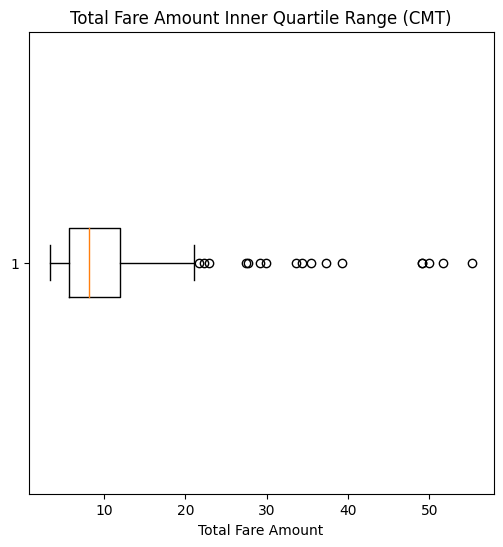

In [ ]:
# IQR of the total fare amount of all CMT rides

# Filter rows with 'CMT' in the 'vendor_name' column
cmt_df = NYTaxi[NYTaxi['vendor_name'] == 'CMT']

# Create a boxplot for the 'Total_Amt' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(cmt_df['Total_Amt'], vert=False)

# Plot legend
plt.xlabel('Total Fare Amount')
plt.title('Total Fare Amount Inner Quartile Range (CMT)')

# Show the plot
plt.show()


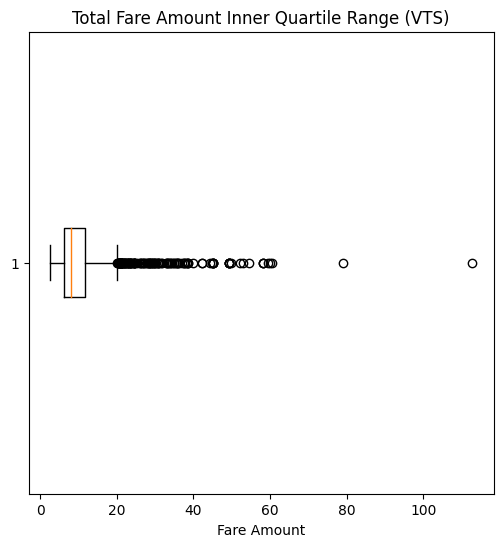

In [ ]:
# IQR of the total fare amount of all VTS rides

# Filter rows with 'VTS' in the 'vendor_name' column
VTS_df = NYTaxi[NYTaxi['vendor_name'] == 'VTS']

# Create a boxplot for the 'Total_Amt' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(VTS_df['Total_Amt'], vert=False)

# Plot legend
plt.xlabel('Fare Amount')
plt.title('Total Fare Amount Inner Quartile Range (VTS)')

# Show the plot
plt.show()


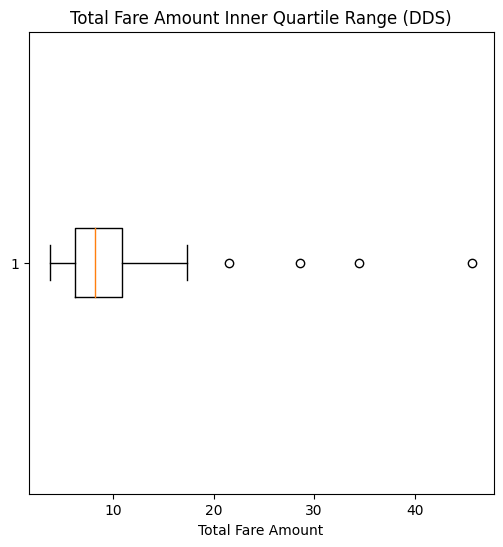

In [ ]:
# IQR of the total fare amount of all DDS rides

# Filter rows with 'DDS' in the 'vendor_name' column
DDS_df = NYTaxi[NYTaxi['vendor_name'] == 'DDS']

# Create a boxplot for the 'Total_Amt' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(DDS_df['Total_Amt'], vert=False)

# Plot legend
plt.xlabel('Total Fare Amount')
plt.title('Total Fare Amount Inner Quartile Range (DDS)')

# Show the plot
plt.show()

## Distance

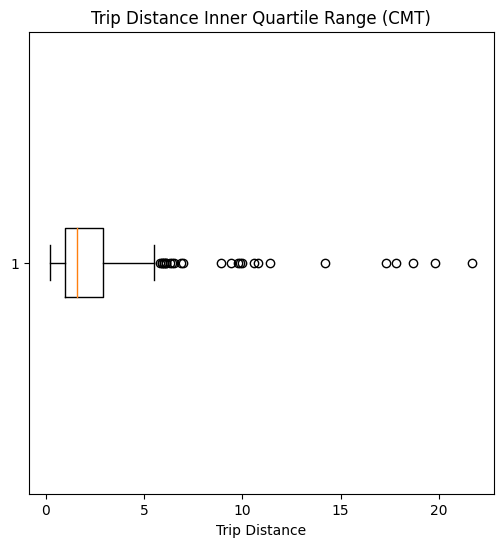

In [ ]:
# IQR of the ride distance of all CMT rides

# Filter rows with 'CMT' in the 'vendor_name' column
cmt_df = NYTaxi[NYTaxi['vendor_name'] == 'CMT']

# Create a boxplot for the 'Trip_Distance' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(cmt_df['Trip_Distance'], vert=False)

# Plot legend
plt.xlabel('Trip Distance')
plt.title('Trip Distance Inner Quartile Range (CMT)')

# Show the plot
plt.show()

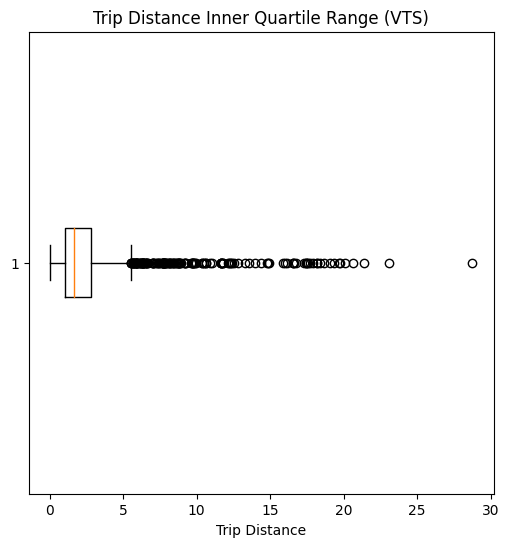

In [ ]:
# IQR of the ride distance of all VTS rides

# Filter rows with 'VTS' in the 'vendor_name' column
VTS_df = NYTaxi[NYTaxi['vendor_name'] == 'VTS']

# Create a boxplot for the 'Trip_Distance' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(VTS_df['Trip_Distance'], vert=False)

# Plot legend
plt.xlabel('Trip Distance')
plt.title('Trip Distance Inner Quartile Range (VTS)')

# Show the plot
plt.show()

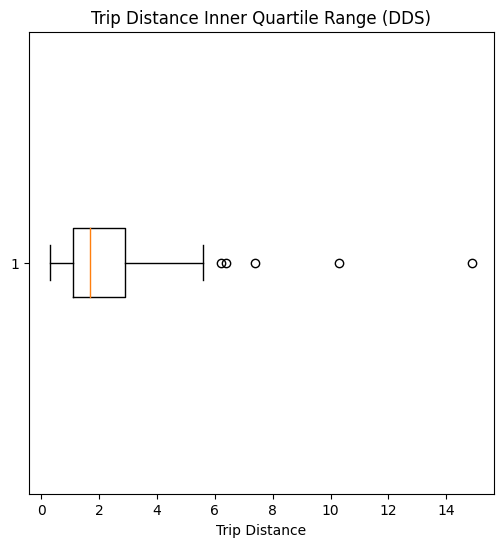

In [ ]:
# IQR of the ride distance of all DDS rides

# Filter rows with 'DDS' in the 'vendor_name' column
DDS_df = NYTaxi[NYTaxi['vendor_name'] == 'DDS']

# Create a boxplot for the 'Trip_Distance' column in the filtered DataFrame
plt.figure(figsize=(6, 6))
plt.boxplot(DDS_df['Trip_Distance'], vert=False)

# Plot legend
plt.xlabel('Trip Distance')
plt.title('Trip Distance Inner Quartile Range (DDS)')

# Show the plot
plt.show()

## Method of Payment

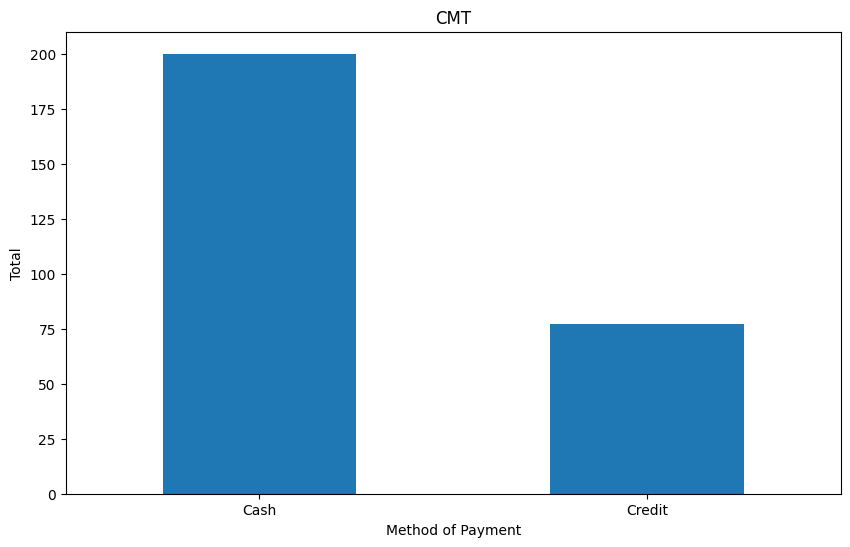

In [ ]:

# Filter rows with 'CMT' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'CMT']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Payment_Type'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Method of Payment')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('CMT')
plt.show()

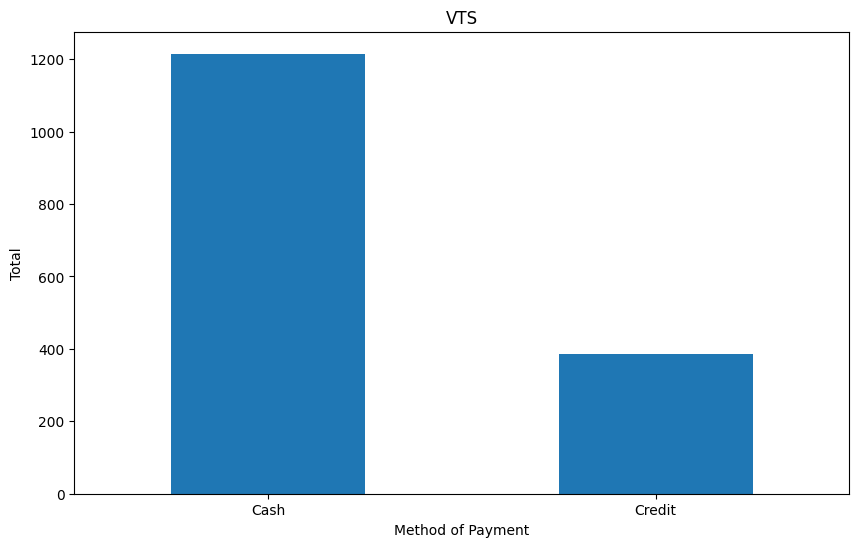

In [ ]:

# Filter rows with 'VTS' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'VTS']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Payment_Type'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Method of Payment')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('VTS')
plt.show()

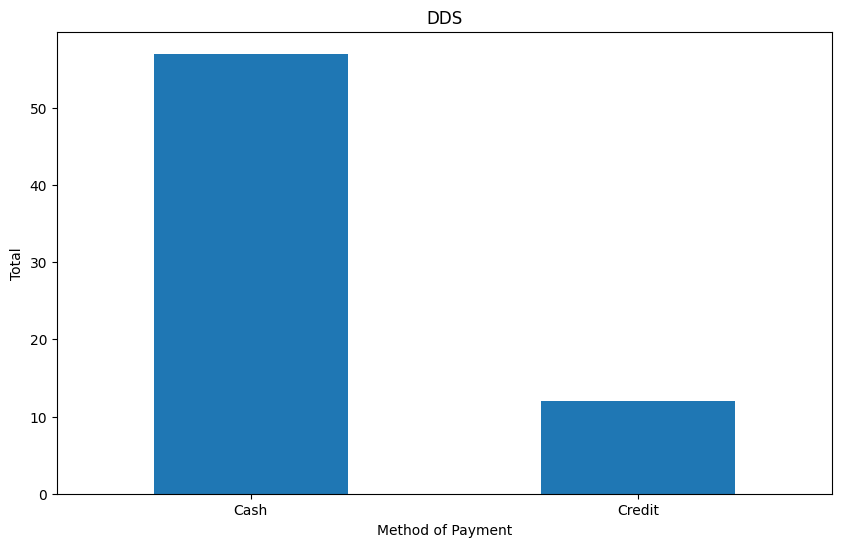

In [ ]:

# Filter rows with 'DDS' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'DDS']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Payment_Type'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Method of Payment')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('DDS')
plt.show()

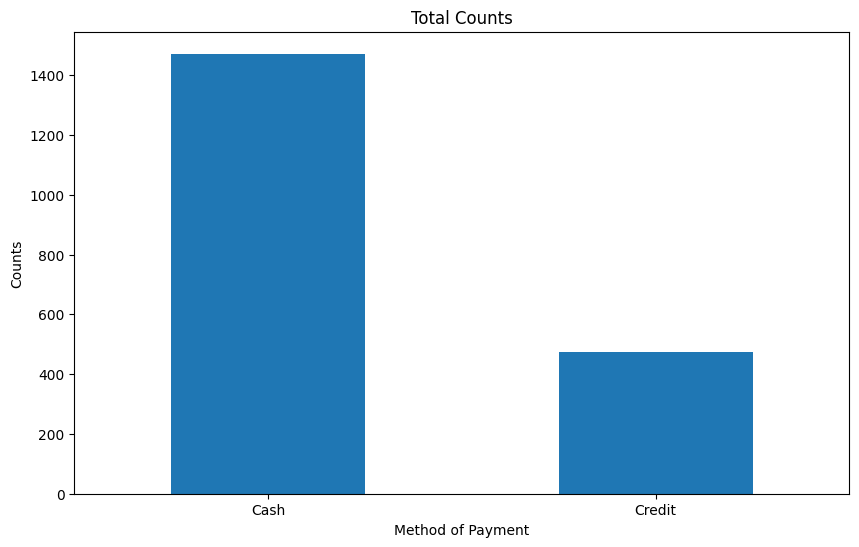

In [ ]:
# Get the value counts of each distinct variable in the column
value_counts = NYTaxi['Payment_Type'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Method of Payment')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.title('Total Counts')
plt.show()

## Passenger Count

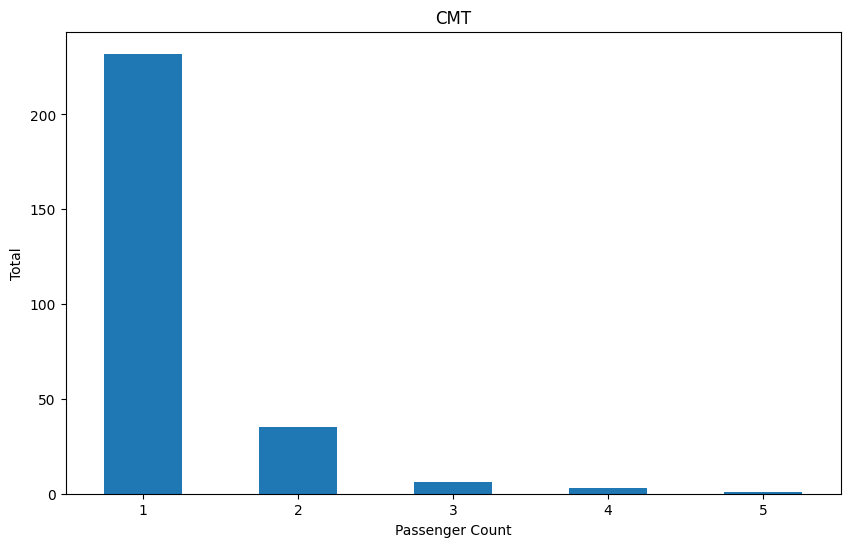

In [ ]:
# Filter rows with 'CMT' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'CMT']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Passenger_Count'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('CMT')
plt.show()

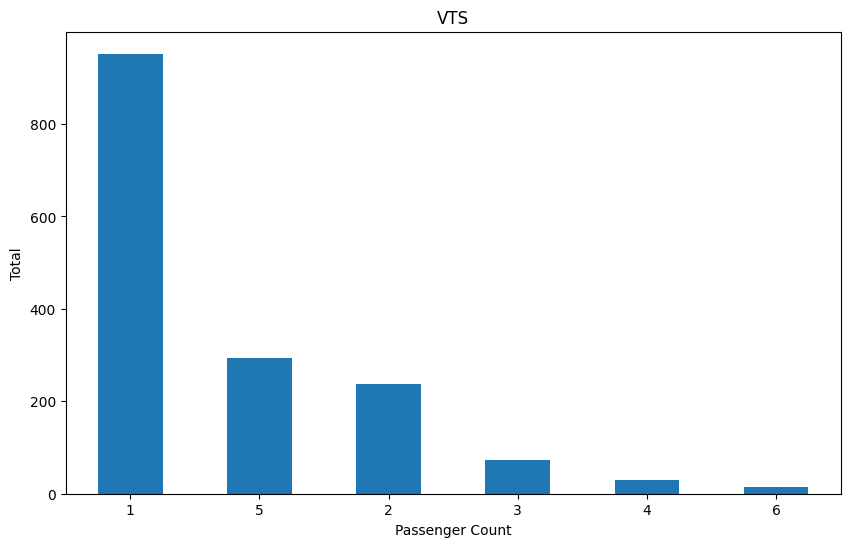

In [ ]:
# Filter rows with 'VTS' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'VTS']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Passenger_Count'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('VTS')
plt.show()

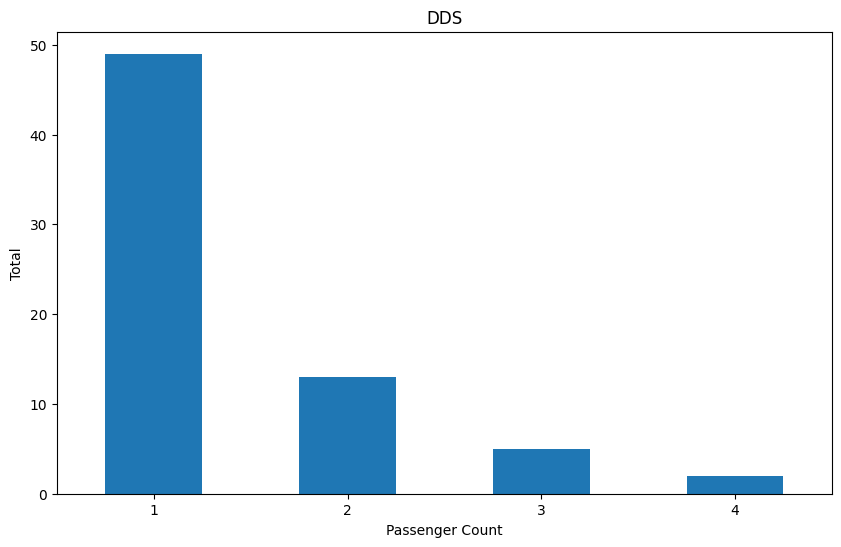

In [ ]:
# Filter rows with 'DDS' in the 'vendor_name' column
filtered_NYTaxi = NYTaxi[NYTaxi['vendor_name'] == 'DDS']

# Get the value counts of each distinct variable in the filtered column
value_counts = filtered_NYTaxi['Passenger_Count'].value_counts()

# Plot a bar graph
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.xticks(rotation='horizontal')
plt.ylabel('Total')
plt.title('DDS')
plt.show()